In [42]:
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import time
import math
from fcmeans import FCM
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans



In [43]:
# loading dataset
data=pd.read_csv('D:\\Traffic_Jam_predictiion_Dataset.csv')

In [44]:
datap=data.iloc[0:22,0:4]
datap.head(11)

,Sample number,Speed(km/hr),Fuel Consumption(ml/sec),CO2 Emission(mg/sec)
0,1,0.00,1.13,2624.72
1,2,1.70,1.37,3180.87
2,3,2.54,1.18,2743.50
3,4,3.12,1.57,3655.93
4,5,2.86,1.49,3460.67
5,6,9.30,3.60,8382.62
6,7,10.43,3.00,6983.71
7,8,11.56,3.86,8971.36
8,9,15.64,3.64,8475.07
9,10,16.48,3.87,9001.59


In [45]:
datap.shape

(22, 4)

In [46]:
datap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0     Sample number           22 non-null     int64  
 1      Speed(km/hr)           22 non-null     float64
 2   Fuel Consumption(ml/sec)  22 non-null     float64
 3   CO2 Emission(mg/sec)      22 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 768.0 bytes


In [47]:
datap.describe()

,Sample number,Speed(km/hr),Fuel Consumption(ml/sec),CO2 Emission(mg/sec)
count,22.000000,22.000000,22.000000,22.000000
mean,11.500000,14.609545,3.758182,8742.570000
std,6.493587,9.593663,2.178531,5068.206855
min,1.000000,0.000000,1.130000,2624.720000
25%,6.250000,6.070000,1.987500,4630.167500
50%,11.500000,16.060000,3.620000,8428.845000
75%,16.750000,22.237500,5.157500,11994.942500
max,22.000000,27.640000,7.750000,18035.660000


In [48]:
df=datap.iloc[:,1:4]
df.head(11)

,Speed(km/hr),Fuel Consumption(ml/sec),CO2 Emission(mg/sec)
0,0.00,1.13,2624.72
1,1.70,1.37,3180.87
2,2.54,1.18,2743.50
3,3.12,1.57,3655.93
4,2.86,1.49,3460.67
5,9.30,3.60,8382.62
6,10.43,3.00,6983.71
7,11.56,3.86,8971.36
8,15.64,3.64,8475.07
9,16.48,3.87,9001.59


Text(0.5, 0, 'z axis')

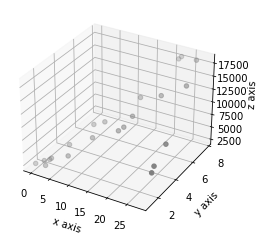

In [49]:
fig = plt.figure()
ax =plt.axes(projection='3d')
ax.scatter3D(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c='gray');
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("z axis")


In [50]:
# To Transform features by scaling each feature to a given range.
scalar=MinMaxScaler()
scalar.fit(df[['Fuel Consumption(ml/sec)']])
df['Fuel Consumption(ml/sec)']=scalar.transform(df[['Fuel Consumption(ml/sec)']])

scalar.fit(df[['CO2 Emission(mg/sec)']])
df['CO2 Emission(mg/sec)']=scalar.transform(df[['CO2 Emission(mg/sec)']])

scalar.fit(df.iloc[:,0:1])
df.iloc[:,0:1]=scalar.transform(df.iloc[:,0:1])

df.head(11)

,Speed(km/hr),Fuel Consumption(ml/sec),CO2 Emission(mg/sec)
0,0.000000,0.000000,0.000000
1,0.061505,0.036254,0.036088
2,0.091896,0.007553,0.007708
3,0.112880,0.066465,0.066914
4,0.103473,0.054381,0.054244
5,0.336469,0.373112,0.373624
6,0.377352,0.282477,0.282850
7,0.418234,0.412387,0.411827
8,0.565847,0.379154,0.379623
9,0.596237,0.413897,0.413789


Text(0.5, 0, 'z axis')

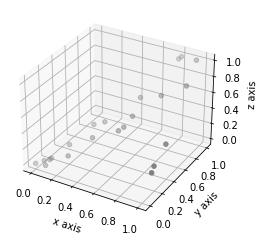

In [51]:
ax =plt.axes(projection='3d')
ax.scatter3D(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c='gray');
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("z axis")


[7.075437085521325, 2.8801571678755153, 1.1877830288112392, 0.5784789253991685, 0.3540138481698066, 0.2760008587076716, 0.2005494962821272, 0.1401945267739833, 0.09340121927862217]


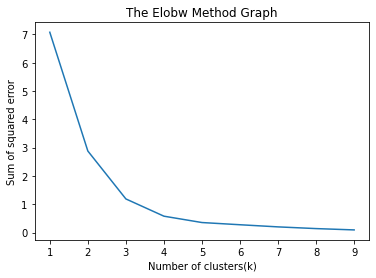

In [52]:
# Elbow method to find ideal no of clusters in dataset
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
print(sse)

plt.title('The Elobw Method Graph')  
plt.ylabel('Sum of squared error')
plt.xlabel('Number of clusters(k)')  
plt.plot(k_rng,sse)

In [53]:
#From the above graph we can onclude that number of clusters is 3.

In [54]:

# K-means algorithm

km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [55]:
dff=df
y_predict=km.fit_predict(dff)
y_predict

array([2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2, 0])

In [56]:
dff['cluster']=y_predict
dff.head(11)

,Speed(km/hr),Fuel Consumption(ml/sec),CO2 Emission(mg/sec),cluster
0,0.000000,0.000000,0.000000,2
1,0.061505,0.036254,0.036088,2
2,0.091896,0.007553,0.007708,2
3,0.112880,0.066465,0.066914,2
4,0.103473,0.054381,0.054244,2
5,0.336469,0.373112,0.373624,0
6,0.377352,0.282477,0.282850,0
7,0.418234,0.412387,0.411827,0
8,0.565847,0.379154,0.379623,0
9,0.596237,0.413897,0.413789,0


In [57]:
km.cluster_centers_

array([[0.65137482, 0.37854985, 0.37857528],
       [0.85781476, 0.89546828, 0.89502704],
       [0.11794501, 0.06732844, 0.06752763]])

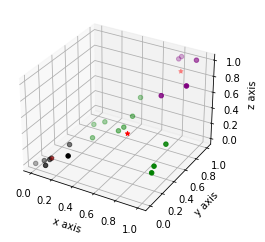

In [58]:
df1=dff[dff.cluster==0]
df2=dff[dff.cluster==1]
df3=dff[dff.cluster==2]

ax1 =plt.axes(projection='3d')
ax1.scatter3D(df1.iloc[:,0],df1.iloc[:,1],df1.iloc[:,2],c='green')
ax1.scatter3D(df2.iloc[:,0],df2.iloc[:,1],df2.iloc[:,2],c='purple')
ax1.scatter3D(df3.iloc[:,0],df3.iloc[:,1],df3.iloc[:,2],c='black')
ax1.scatter3D(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],c='red',label='centroid',marker="*")
ax1.set_xlabel("x axis")
ax1.set_ylabel("y axis")
ax1.set_zlabel("z axis")


plt.show()

In [59]:
# average computing time of K-means algorithm for cluster 2,3,4,5 for 50 iterations

data1=df.drop(columns=['cluster'])
avg=[]
for pos in range(2,6):
    start_time = time.time()
    for i in range(0,50):
        kmn = KMeans(n_clusters=pos)
        kmn.fit(data1)
        kmn.predict(data1)
    end_time = time.time()
    avg.append((end_time-start_time)/50)
avg

[0.010911512374877929,
 0.014122223854064942,
 0.015303931236267089,
 0.017359247207641603]

0.28002372818438637
0.2799040036445224


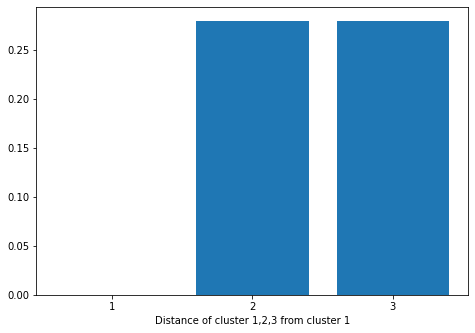

0.28002372818438637
0.00048478374299643637


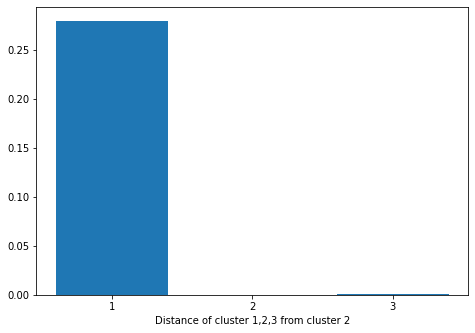

0.2799040036445224
0.00048478374299643637


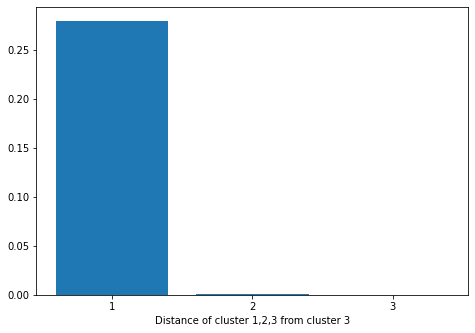

In [60]:
kme=km.cluster_centers_

# distance of cluster 1 from cluster 2 
ed1=math.sqrt((kme[0,0]-kme[0,1])**2+(kme[1,0]-kme[1,1])**2+(kme[2,0]-kme[2,1])**2)
print(ed1)

# distance of cluster 1 from cluster 3 
ed2=math.sqrt(((kme[0,0]-kme[0,2])**2)+((kme[1,0]-kme[1,2])**2)+((kme[2,0]-kme[2,2])**2))
print(ed2)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cluster1 = ['1', '2', '3']
dist1 = [0,ed1,ed2]
ax.bar(cluster1,dist1)
ax.set_xlabel("Distance of cluster 1,2,3 from cluster 1")
plt.show()

# distance of cluster 2 from cluster 1 
ed3=math.sqrt(((kme[0,1]-kme[0,0])**2)+((kme[1,1]-kme[1,0])**2)+((kme[2,1]-kme[2,0])**2))
print(ed3)

# distance of cluster 2 from cluster 3 
ed4=math.sqrt(((kme[0,1]-kme[0,2])**2)+((kme[1,1]-kme[1,2])**2)+((kme[2,1]-kme[2,2])**2))
print(ed4)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cluster2 = ['1', '2', '3']
dist2 = [ed3,0,ed4]
ax.bar(cluster2,dist2)
ax.set_xlabel("Distance of cluster 1,2,3 from cluster 2")
plt.show()


# distance of cluster 3 from cluster 1 
ed5=math.sqrt(((kme[0,2]-kme[0,0])**2)+((kme[1,2]-kme[1,0])**2)+((kme[2,2]-kme[2,0])**2))
print(ed5)

# distance of cluster 3 from cluster 2
ed6=math.sqrt(((kme[0,2]-kme[0,1])**2)+((kme[1,2]-kme[1,1])**2)+((kme[2,2]-kme[2,1])**2))
print(ed6)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cluster3 = ['1', '2', '3']
dist3 = [ed5,ed6,0]
ax.bar(cluster3,dist3)
ax.set_xlabel("Distance of cluster 1,2,3 from cluster 3")
plt.show()

In [61]:
# Fuzzy C-Means Clustering

dff1=df.drop(columns=['cluster'])
dff1.head(11)

,Speed(km/hr),Fuel Consumption(ml/sec),CO2 Emission(mg/sec)
0,0.000000,0.000000,0.000000
1,0.061505,0.036254,0.036088
2,0.091896,0.007553,0.007708
3,0.112880,0.066465,0.066914
4,0.103473,0.054381,0.054244
5,0.336469,0.373112,0.373624
6,0.377352,0.282477,0.282850
7,0.418234,0.412387,0.411827
8,0.565847,0.379154,0.379623
9,0.596237,0.413897,0.413789


In [62]:
fcm=FCM(n_clusters=3)
fcm.fit(dff1)

In [63]:
y1_predict = fcm.predict(dff1)
y1_predict

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 0, 0, 1],
      dtype=int32)

In [64]:
dff1['cluster']=y1_predict
dff1.head(11)

,Speed(km/hr),Fuel Consumption(ml/sec),CO2 Emission(mg/sec),cluster
0,0.000000,0.000000,0.000000,0
1,0.061505,0.036254,0.036088,0
2,0.091896,0.007553,0.007708,0
3,0.112880,0.066465,0.066914,0
4,0.103473,0.054381,0.054244,0
5,0.336469,0.373112,0.373624,1
6,0.377352,0.282477,0.282850,1
7,0.418234,0.412387,0.411827,1
8,0.565847,0.379154,0.379623,1
9,0.596237,0.413897,0.413789,1


In [65]:
fcm_centers = fcm.centers
fcm_centers

,Speed(km/hr),Fuel Consumption(ml/sec),CO2 Emission(mg/sec)
0,0.133588,0.075656,0.075851
1,0.652515,0.386767,0.386776
2,0.855868,0.900466,0.900072


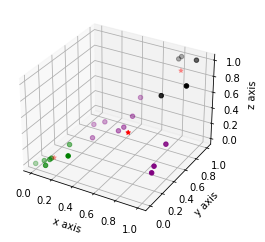

In [66]:
dv1=dff1[dff1.cluster==0]
dv2=dff1[dff1.cluster==1]
dv3=dff1[dff1.cluster==2]

ax2 =plt.axes(projection='3d')
ax2.scatter3D(dv1.iloc[:,0],dv1.iloc[:,1],dv1.iloc[:,2],c='green')
ax2.scatter3D(dv2.iloc[:,0],dv2.iloc[:,1],dv2.iloc[:,2],c='purple')
ax2.scatter3D(dv3.iloc[:,0],dv3.iloc[:,1],dv3.iloc[:,2],c='black')
ax2.scatter3D(fcm_centers.iloc[:,0],fcm_centers.iloc[:,1],fcm_centers.iloc[:,2],c='red',marker="*")
ax2.set_xlabel("x axis")
ax2.set_ylabel("y axis")
ax2.set_zlabel("z axis")



plt.show()


In [67]:
# average computing time of fuzzy c-means algorithm for cluster 2,3,4,5 for 50 iterations

data2=df.drop(columns=['cluster'])
avg1=[]
for pos in range(2,6):
    start_time = time.time()
    for i in range(0,50):
        fcmn = FCM(n_clusters=pos)
        fcmn.fit(data2)
        fcmn.predict(data2)
    end_time = time.time()
    avg1.append((end_time-start_time)/50)

avg1

[0.05494550228118897,
 0.03441559791564942,
 0.0471639347076416,
 0.12008299350738526]

0.27562186674842126
0.2755082320974051


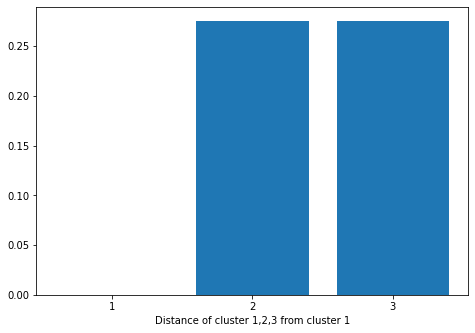

0.27562186674842126
0.0004395566860893733


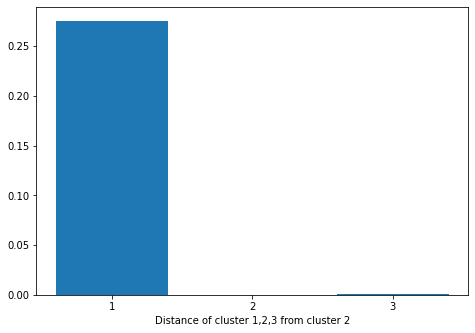

0.2755082320974051
0.0004395566860893733


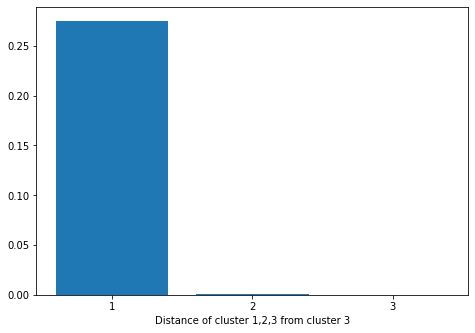

In [68]:
fcm1=fcm.centers

# distance of cluster 1 from cluster 2 
eud1=math.sqrt((fcm1.iloc[0,0]-fcm1.iloc[0,1])**2+(fcm1.iloc[1,0]-fcm1.iloc[1,1])**2+(fcm1.iloc[2,0]-fcm1.iloc[2,1])**2)
print(eud1)

# distance of cluster 1 from cluster 3 
eud2=math.sqrt(((fcm1.iloc[0,0]-fcm1.iloc[0,2])**2)+((fcm1.iloc[1,0]-fcm1.iloc[1,2])**2)+((fcm1.iloc[2,0]-fcm1.iloc[2,2])**2))
print(eud2)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cluster1 = ['1', '2', '3']
dist1 = [0,eud1,eud2]
ax.bar(cluster1,dist1)
ax.set_xlabel("Distance of cluster 1,2,3 from cluster 1")
plt.show()  

# distance of cluster 2 from cluster 1 
eud3=math.sqrt(((fcm1.iloc[0,1]-fcm1.iloc[0,0])**2)+((fcm1.iloc[1,1]-fcm1.iloc[1,0])**2)+((fcm1.iloc[2,1]-fcm1.iloc[2,0])**2))
print(eud3)

# distance of cluster 2 from cluster 3 
eud4=math.sqrt(((fcm1.iloc[0,1]-fcm1.iloc[0,2])**2)+((fcm1.iloc[1,1]-fcm1.iloc[1,2])**2)+((fcm1.iloc[2,1]-fcm1.iloc[2,2])**2))
print(eud4)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cluster2 = ['1', '2', '3']
dist2 = [eud3,0,eud4]
ax.bar(cluster2,dist2)
ax.set_xlabel("Distance of cluster 1,2,3 from cluster 2")
plt.show() 

# distance of cluster 3 from cluster 1 
eud5=math.sqrt(((fcm1.iloc[0,2]-fcm1.iloc[0,0])**2)+((fcm1.iloc[1,2]-fcm1.iloc[1,0])**2)+((fcm1.iloc[2,2]-fcm1.iloc[2,0])**2))
print(eud5)

# distance of cluster 3 from cluster 2
eud6=math.sqrt(((fcm1.iloc[0,2]-fcm1.iloc[0,1])**2)+((fcm1.iloc[1,2]-fcm1.iloc[1,1])**2)+((fcm1.iloc[2,2]-fcm1.iloc[2,1])**2))
print(eud6)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cluster3 = ['1', '2', '3']
dist3 = [eud5,eud6,0]
ax.bar(cluster3,dist3)
ax.set_xlabel("Distance of cluster 1,2,3 from cluster 3")
plt.show()

In [69]:
# mini-batch k-means clustering

dff2=df.drop(columns=['cluster'])
dff2.head(11)

,Speed(km/hr),Fuel Consumption(ml/sec),CO2 Emission(mg/sec)
0,0.000000,0.000000,0.000000
1,0.061505,0.036254,0.036088
2,0.091896,0.007553,0.007708
3,0.112880,0.066465,0.066914
4,0.103473,0.054381,0.054244
5,0.336469,0.373112,0.373624
6,0.377352,0.282477,0.282850
7,0.418234,0.412387,0.411827
8,0.565847,0.379154,0.379623
9,0.596237,0.413897,0.413789


In [70]:
minb = MiniBatchKMeans(n_clusters=3)
minb.fit(dff2)


MiniBatchKMeans(n_clusters=3)

In [71]:
y2_predict=minb.predict(dff2)
y2_predict

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2])

In [72]:
dff2['cluster']=y2_predict
dff2.head(11)

,Speed(km/hr),Fuel Consumption(ml/sec),CO2 Emission(mg/sec),cluster
0,0.000000,0.000000,0.000000,0
1,0.061505,0.036254,0.036088,0
2,0.091896,0.007553,0.007708,0
3,0.112880,0.066465,0.066914,0
4,0.103473,0.054381,0.054244,0
5,0.336469,0.373112,0.373624,2
6,0.377352,0.282477,0.282850,2
7,0.418234,0.412387,0.411827,2
8,0.565847,0.379154,0.379623,2
9,0.596237,0.413897,0.413789,2


In [73]:
minb.cluster_centers_

array([[0.11470273, 0.06186224, 0.06205586],
       [0.82501392, 0.85415292, 0.85372504],
       [0.65468611, 0.34398541, 0.34406032]])

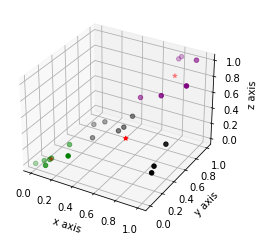

In [74]:
db1=dff2[dff2.cluster==0]
db2=dff2[dff2.cluster==1]
db3=dff2[dff2.cluster==2]

ax3 =plt.axes(projection='3d')
ax3.scatter3D(db1.iloc[:,0],db1.iloc[:,1],db1.iloc[:,2],c='green')
ax3.scatter3D(db2.iloc[:,0],db2.iloc[:,1],db2.iloc[:,2],c='purple')
ax3.scatter3D(db3.iloc[:,0],db3.iloc[:,1],db3.iloc[:,2],c='black')
ax3.scatter3D(minb.cluster_centers_[:,0],minb.cluster_centers_[:,1],minb.cluster_centers_[:,2],c='red',label='centroid',marker="*")
ax3.set_xlabel("x axis")
ax3.set_ylabel("y axis")
ax3.set_zlabel("z axis")


plt.show()

In [75]:
# average computing time of Mini batch k-means algorithm for cluster 2,3,4,5 for 50 iterations
data3=df.drop(columns=['cluster'])
avg2=[]
for pos in range(2,6):
    start_time = time.time()
    for i in range(0,50):
        minb1 = MiniBatchKMeans(n_clusters=3)
        minb1.fit(data3)
        minb1.predict(data3)
    end_time = time.time()
    avg2.append((end_time-start_time)/50)

avg2

[0.0521345043182373,
 0.05113152503967285,
 0.05001185894012451,
 0.049977869987487794]

0.31650611887275715
0.3163611907893274


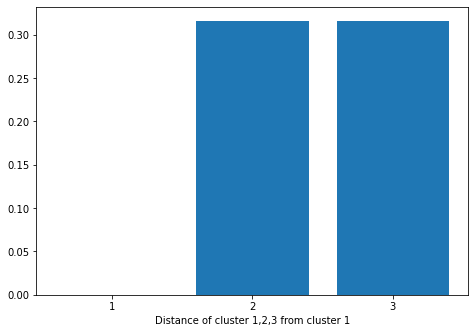

0.31650611887275715
0.00047558606022226506


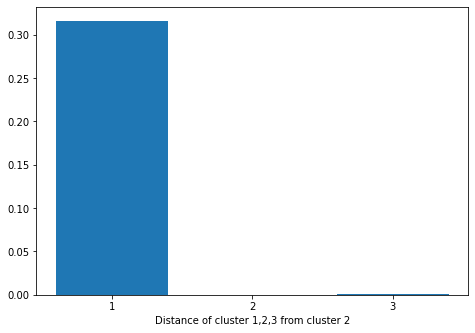

0.3163611907893274
0.00047558606022226506


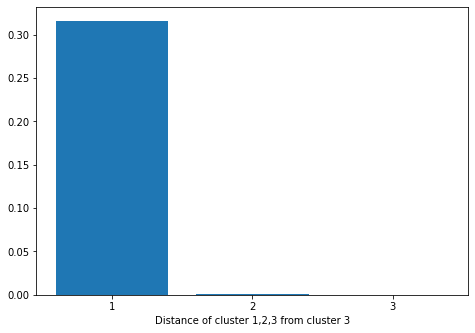

In [76]:
mnk=minb.cluster_centers_

# distance of cluster 1 from cluster 2 
ek1=math.sqrt((mnk[0,0]-mnk[0,1])**2+(mnk[1,0]-mnk[1,1])**2+(mnk[2,0]-mnk[2,1])**2)
print(ek1)

# distance of cluster 1 from cluster 3 
ek2=math.sqrt(((mnk[0,0]-mnk[0,2])**2)+((mnk[1,0]-mnk[1,2])**2)+((mnk[2,0]-mnk[2,2])**2))
print(ek2)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cluster1 = ['1', '2', '3']
dist1 = [0,ek1,ek2]
ax.bar(cluster1,dist1)
ax.set_xlabel("Distance of cluster 1,2,3 from cluster 1")
plt.show()

# distance of cluster 2 from cluster 1 
ek3=math.sqrt(((mnk[0,1]-mnk[0,0])**2)+((mnk[1,1]-mnk[1,0])**2)+((mnk[2,1]-mnk[2,0])**2))
print(ek3)

# distance of cluster 2 from cluster 3 
ek4=math.sqrt(((mnk[0,1]-mnk[0,2])**2)+((mnk[1,1]-mnk[1,2])**2)+((mnk[2,1]-mnk[2,2])**2))
print(ek4)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cluster2 = ['1', '2', '3']
dist2 = [ek3,0,ek4]
ax.bar(cluster2,dist2)
ax.set_xlabel("Distance of cluster 1,2,3 from cluster 2")
plt.show()


# distance of cluster 3 from cluster 1 
ek5=math.sqrt(((mnk[0,2]-mnk[0,0])**2)+((mnk[1,2]-mnk[1,0])**2)+((mnk[2,2]-mnk[2,0])**2))
print(ek5)

# distance of cluster 3 from cluster 2
ek6=math.sqrt(((mnk[0,2]-mnk[0,1])**2)+((mnk[1,2]-mnk[1,1])**2)+((mnk[2,2]-mnk[2,1])**2))
print(ek6)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cluster3 = ['1', '2', '3']
dist3 = [ek5,ek6,0]
ax.bar(cluster3,dist3)
ax.set_xlabel("Distance of cluster 1,2,3 from cluster 3")
plt.show()


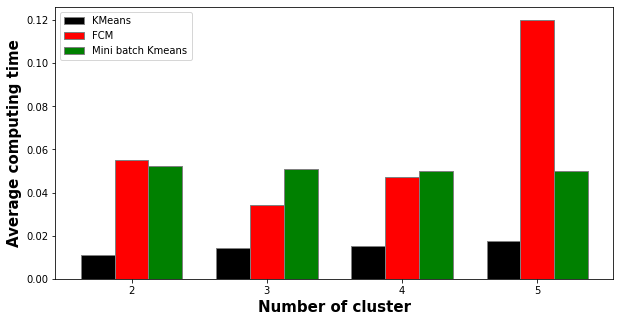

In [77]:
barWidth = 0.25
fig = plt.figure(figsize = (10, 5))

# Set position of bar on X axis
br1 = np.arange(len(avg))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# Make the plot
plt.bar(br1, avg, color ='black', width = barWidth,
        edgecolor ='grey', label ='KMeans')
plt.bar(br2, avg1, color ='red', width = barWidth,
        edgecolor ='grey', label ='FCM')
plt.bar(br3, avg2, color ='green', width = barWidth,
        edgecolor ='grey', label ='Mini batch Kmeans')

# Adding Xticks
plt.xlabel('Number of cluster', fontweight ='bold', fontsize = 15)
plt.ylabel('Average computing time', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(avg))],
        ['2', '3', '4', '5'])

plt.legend()
plt.show()